In [ ]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.linear_model import LogisticRegression

%matplotlib inline
warnings.filterwarnings('ignore')

In [ ]:
!curl -L -o mobile-price-classification.zip https://www.kaggle.com/api/v1/datasets/download/iabhishekofficial/mobile-price-classification
!unzip mobile-price-classification.zip

data = pd.read_csv('train.csv')

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 72340  100 72340    0     0  61724      0  0:00:01  0:00:01 --:--:--  291k
Archive:  mobile-price-classification.zip
  inflating: test.csv                
  inflating: train.csv               


In [ ]:
data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


#**Exploratory data analysis**

посмотреть на сбалансированность классов; корреляции признаков; статистику по отдельным признакам (минимум два графика).




In [ ]:
data.describe().apply(lambda s: s.apply('{:.2f}'.format))

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.00,2000.00,2000.00,2000.00,2000.00,2000.00,2000.00,2000.00,2000.00,2000.00,...,2000.00,2000.00,2000.00,2000.00,2000.00,2000.00,2000.00,2000.00,2000.00,2000.00
mean,1238.52,0.49,1.52,0.51,4.31,0.52,32.05,0.50,140.25,4.52,...,645.11,1251.52,2124.21,12.31,5.77,11.01,0.76,0.50,0.51,1.50
std,439.42,0.50,0.82,0.50,4.34,0.50,18.15,0.29,35.40,2.29,...,443.78,432.20,1084.73,4.21,4.36,5.46,0.43,0.50,0.50,1.12
min,501.00,0.00,0.50,0.00,0.00,0.00,2.00,0.10,80.00,1.00,...,0.00,500.00,256.00,5.00,0.00,2.00,0.00,0.00,0.00,0.00
25%,851.75,0.00,0.70,0.00,1.00,0.00,16.00,0.20,109.00,3.00,...,282.75,874.75,1207.50,9.00,2.00,6.00,1.00,0.00,0.00,0.75
50%,1226.00,0.00,1.50,1.00,3.00,1.00,32.00,0.50,141.00,4.00,...,564.00,1247.00,2146.50,12.00,5.00,11.00,1.00,1.00,1.00,1.50
75%,1615.25,1.00,2.20,1.00,7.00,1.00,48.00,0.80,170.00,7.00,...,947.25,1633.00,3064.50,16.00,9.00,16.00,1.00,1.00,1.00,2.25
max,1998.00,1.00,3.00,1.00,19.00,1.00,64.00,1.00,200.00,8.00,...,1960.00,1998.00,3998.00,19.00,18.00,20.00,1.00,1.00,1.00,3.00


Все ценовые диапазоны одинаково представлены в датасете

In [ ]:
data["price_range"].value_counts()

,count
price_range,
1,500
2,500
3,500
0,500


In [ ]:
data.groupby(["price_range"]).mean()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
price_range,,,,,,,,,,,,,,,,,,,,
0,1116.902,0.486,1.5502,0.500,4.084,0.518,31.174,0.4902,140.552,4.600,9.574,536.408,1150.270,785.314,12.324,5.682,10.612,0.746,0.524,0.496
1,1228.868,0.490,1.4886,0.510,4.340,0.524,32.116,0.5240,140.510,4.298,9.924,666.892,1251.908,1679.490,12.212,5.544,11.362,0.756,0.522,0.504
2,1228.320,0.486,1.5298,0.498,4.498,0.494,30.920,0.4908,143.614,4.682,10.018,632.284,1234.046,2582.816,12.010,5.714,10.972,0.774,0.470,0.504
3,1379.984,0.518,1.5204,0.530,4.316,0.550,33.976,0.5020,136.320,4.502,10.150,744.848,1369.838,3449.232,12.680,6.128,11.098,0.770,0.496,0.524


На этом этапе можно предположить, что ценовой диапазон будет положительно
коррелировать с pc, RAM, battery_power

In [ ]:
data.groupby(["price_range"]).mean()[["pc", "ram", "battery_power"]]

,pc,ram,battery_power
price_range,,,
0,9.574,785.314,1116.902
1,9.924,1679.490,1228.868
2,10.018,2582.816,1228.320
3,10.150,3449.232,1379.984


In [ ]:
data.groupby(["price_range"]).median()[["pc", "ram", "battery_power"]]

,pc,ram,battery_power
price_range,,,
0,9.5,719.5,1066.0
1,10.0,1686.5,1206.0
2,10.0,2577.0,1219.5
3,10.0,3509.5,1449.5


более явной, видимо, будет связь ценового диапазона с ram и battery_power

<Axes: >

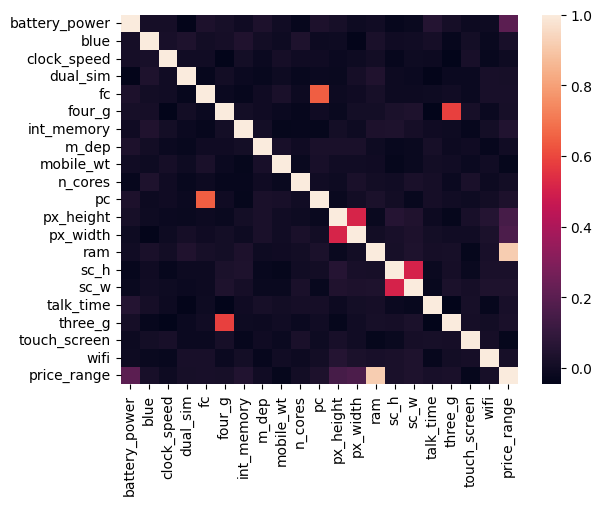

In [ ]:
sns.heatmap(data.corr())

Из хитмэпа видно, что присутствует сильная корреляция между ценовым диапазоном и оперативной памятью, а также слабая корреляция ценового диапазона с мощностью батареи и размером экрана и совсем слабая с int_memory

four_g и three_g, fc и pc -- зависимые признаки, один из каждой пары уберем

In [ ]:
data = data.drop(columns=['four_g', 'fc'])

Убедимся, что нет связи между ценовым диапазоном и pc

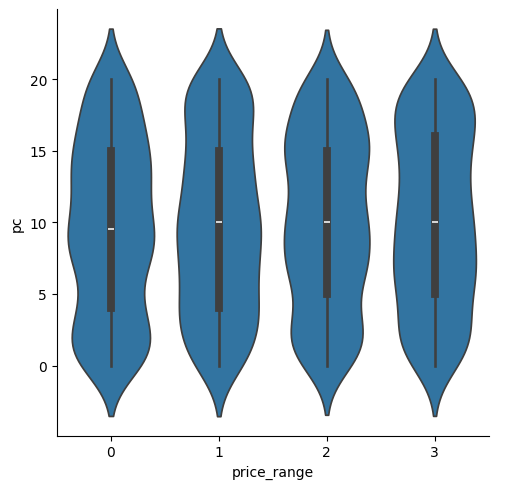

In [ ]:
sns.catplot(
    data,
    x="price_range", y="pc", kind = "violin"
)

Действительно, параметр pc имеет почти одинаковое распределение для всех ценовых диапазонов, значит он будет не очень полезен для обучения

посмотрим на  RAM, мощность батареи и ширину экрана

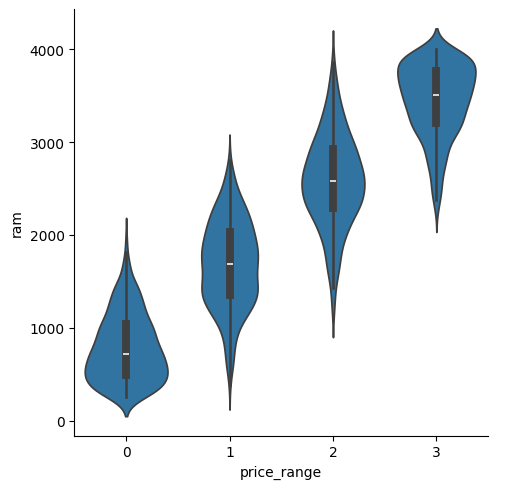

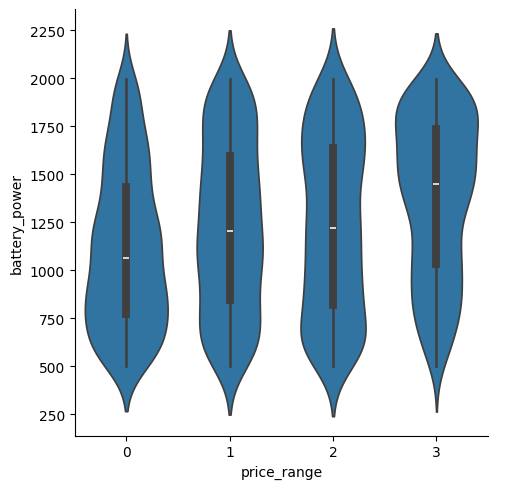

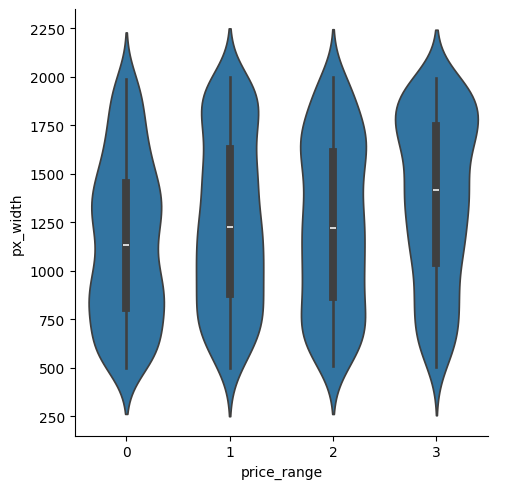

In [ ]:
sns.catplot(
    data,
    x="price_range", y="ram", kind = "violin"
)
sns.catplot(
    data,
    x="price_range", y="battery_power", kind = "violin"
)
sns.catplot(
    data,
    x="price_range", y="px_width", kind = "violin"
)

У параметров px_width и battery_power сильно отличается распределение для крайних ценовых диапазонов

Распределение ценовых диапазонов по рассмотренным параметрам

In [ ]:
cor_data = data[["price_range", "ram", "px_height", "battery_power", "int_memory"]]

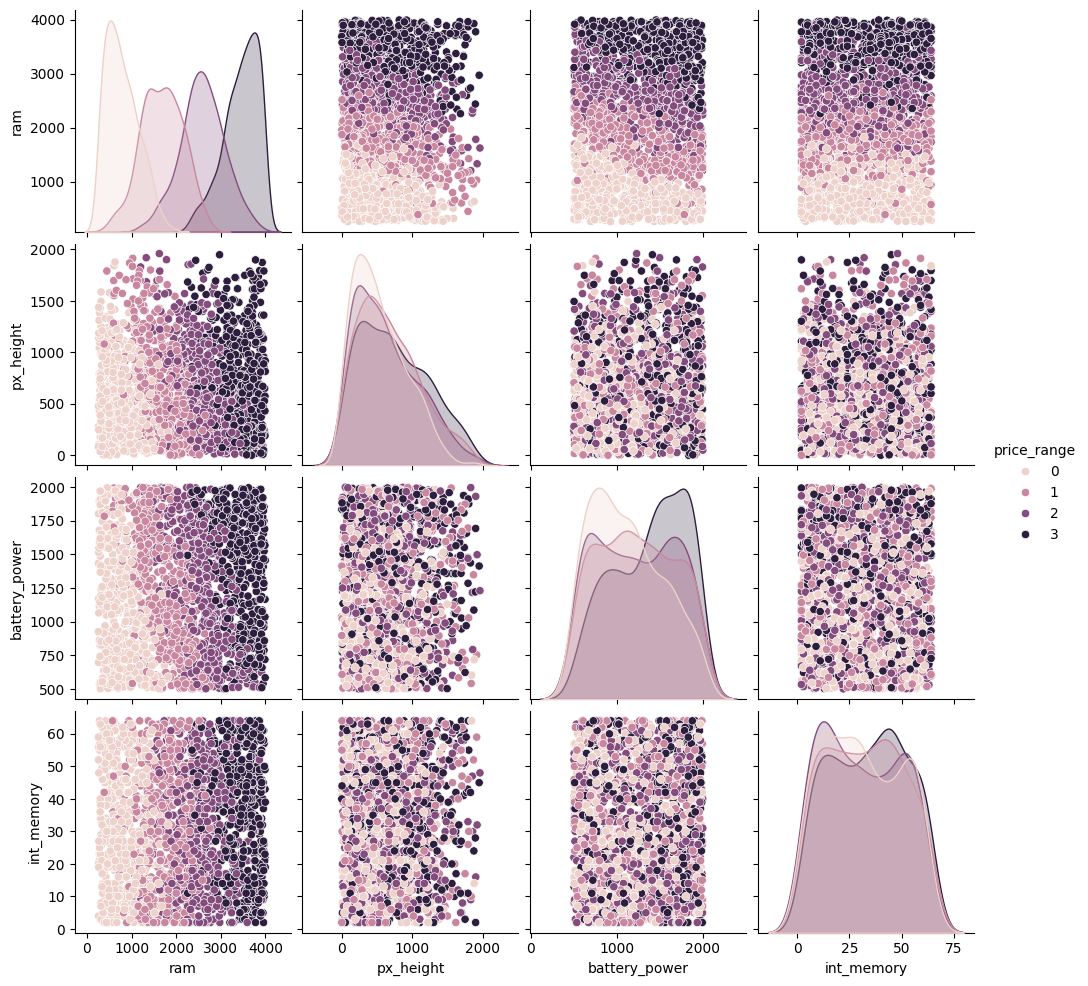

In [ ]:
sns.pairplot(cor_data, hue='price_range');

#**Обучение классификаторов**#

###**KNN**###

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [ ]:

X = data.drop(['price_range'], axis=1)
y = data['price_range']

# разбиваем на тренировочную, тестовую и валидационную выборки

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=1
    )

X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.33, random_state=1
    )


In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [ ]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 2000 entries, 0 to 1999
Series name: price_range
Non-Null Count  Dtype
--------------  -----
2000 non-null   int64
dtypes: int64(1)
memory usage: 15.8 KB


In [ ]:
data

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [ ]:
k_best = -1
best_accuracy = 0

for k in range(1, 12):
    y_predicted = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train).predict(X_val)

    val_accuracy = accuracy_score(y_val, y_predicted)
    print(f'k = {k}; accuracy = {val_accuracy:.3f}')

    if val_accuracy > best_accuracy:
        best_accuracy = val_accuracy
        k_best = k

k = 1; accuracy = 0.891
k = 2; accuracy = 0.895
k = 3; accuracy = 0.911
k = 4; accuracy = 0.901
k = 5; accuracy = 0.929
k = 6; accuracy = 0.923
k = 7; accuracy = 0.941
k = 8; accuracy = 0.939
k = 9; accuracy = 0.941
k = 10; accuracy = 0.939
k = 11; accuracy = 0.947


In [ ]:
knn = KNeighborsClassifier(n_neighbors=k_best)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=11)

In [ ]:
preds = knn.predict(X_test)
print(classification_report(preds, y_test))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       115
           1       0.90      0.91      0.90       124
           2       0.90      0.82      0.86       148
           3       0.87      0.95      0.91       113

    accuracy                           0.91       500
   macro avg       0.91      0.91      0.91       500
weighted avg       0.91      0.91      0.91       500



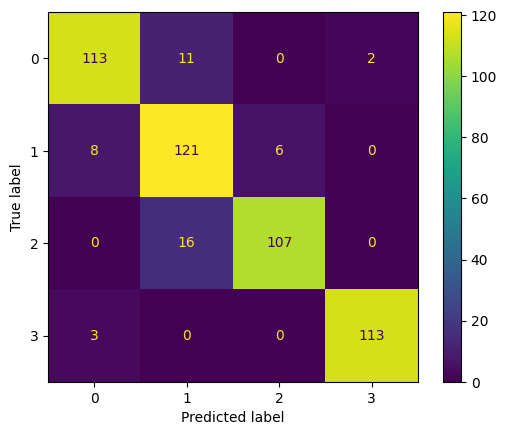

In [ ]:
matrix = confusion_matrix(y_test, preds, labels=y.unique(), normalize=None)

disp = ConfusionMatrixDisplay(confusion_matrix=matrix)
disp.plot()

На матрице видно, что самый большой процент ошибок -- отнесение телефонов из ценового диапазона 2 к ценовому диапазону один, это соответствует выводам, которые можно сделать из распределения параметров

Относительно низкая точность предсказания 1 и 2 диапазона объясняется тем, что у нас только один параметр, распределение которого значительно отличается для этих диапазонов(ram)

11 ошибочно отнесенных к первому диапазону телефонов из диапазона 0 можно объяснить тем, что в диапазоне 1 есть модели с нетипично низким для этого диапазона количеством ram, что можно увидеть на графике с распределением


Наибольший вклад без нормализации вносят RAM и размер экрана из-за больших количественных значений, что в данном случае улучшает точность, потому что именно с ними сильно коррелирует цена


При нормализации данных точность значительно падает:

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(data.select_dtypes("number"))
norm_data = sc.transform(data.select_dtypes("number"))
norm_data = pd.DataFrame(norm_data)
norm_data.columns = data.select_dtypes("number").columns
norm_data.head()

,battery_power,blue,clock_speed,dual_sim,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,-0.902597,-0.990050,0.830779,-1.019184,-1.380644,0.340740,1.349249,-1.101971,-1.305750,-1.408949,-1.146784,0.391703,-0.784983,0.283103,1.462493,-1.786861,-1.006018,0.986097,-0.447214
1,-0.495139,1.010051,-1.253064,0.981177,1.155024,0.687548,-0.120059,-0.664768,-0.645989,0.585778,1.704465,0.467317,1.114266,-0.635317,-0.734267,0.559641,0.994018,-1.014099,0.447214
2,-1.537686,1.010051,-1.253064,0.981177,0.493546,1.381165,0.134244,0.209639,-0.645989,1.392684,1.074968,0.441498,-0.310171,-0.864922,-0.368140,0.559641,0.994018,-1.014099,0.447214
3,-1.419319,1.010051,1.198517,-1.019184,-1.215274,1.034357,-0.261339,0.646842,-0.151168,1.286750,1.236971,0.594569,0.876859,0.512708,-0.002014,0.559641,-1.006018,-1.014099,0.447214
4,1.325906,1.010051,-0.395011,-1.019184,0.658915,0.340740,0.021220,-1.101971,0.673534,1.268718,-0.091452,-0.657666,-1.022389,-0.864922,0.730240,0.559641,0.994018,-1.014099,-0.447214


              precision    recall  f1-score   support

           0       0.72      0.62      0.67       135
           1       0.47      0.42      0.44       141
           2       0.44      0.49      0.47       122
           3       0.59      0.72      0.65       102

    accuracy                           0.55       500
   macro avg       0.56      0.56      0.56       500
weighted avg       0.56      0.55      0.55       500



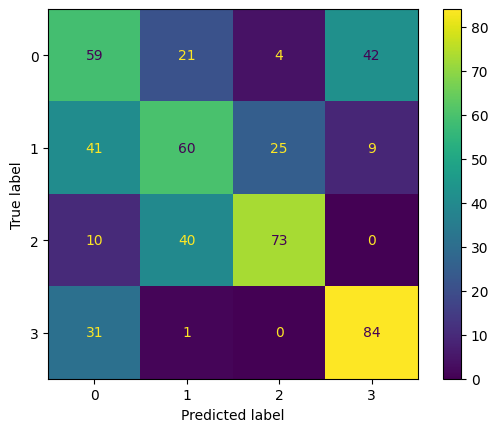

In [ ]:
try_data = norm_data

X = try_data.drop(['price_range'], axis=1)
y = data['price_range']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=1
    )

X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.33, random_state=1
    )

k_best = -1
best_accuracy = 0

for k in range(1, 12):
    y_predicted = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train).predict(X_val)

    val_accuracy = accuracy_score(y_val, y_predicted)

    if val_accuracy > best_accuracy:
        best_accuracy = val_accuracy
        k_best = k

knn = KNeighborsClassifier(n_neighbors=k_best)
knn.fit(X_train, y_train)

preds = knn.predict(X_test)
print(classification_report(preds, y_test))
matrix = confusion_matrix(y_test, preds, labels=y.unique(), normalize=None)

disp = ConfusionMatrixDisplay(confusion_matrix=matrix)
disp.plot()

если оставить только параметры с заментой корреляцией с ценой, точность поднимется

              precision    recall  f1-score   support

           0       0.95      0.93      0.94       118
           1       0.89      0.82      0.85       137
           2       0.82      0.78      0.80       143
           3       0.79      0.95      0.86       102

    accuracy                           0.86       500
   macro avg       0.86      0.87      0.86       500
weighted avg       0.86      0.86      0.86       500



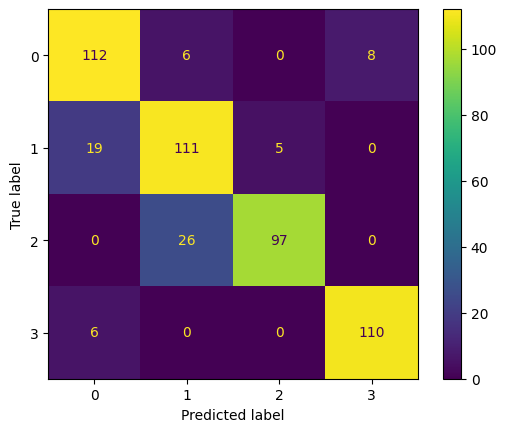

In [ ]:

try_data = norm_data[["battery_power", "px_height", "ram"]]

X = try_data
y = data['price_range']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=1
    )

X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.33, random_state=1
    )

k_best = -1
best_accuracy = 0

for k in range(1, 12):
    y_predicted = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train).predict(X_val)

    val_accuracy = accuracy_score(y_val, y_predicted)

    if val_accuracy > best_accuracy:
        best_accuracy = val_accuracy
        k_best = k

knn = KNeighborsClassifier(n_neighbors=k_best)
knn.fit(X_train, y_train)

preds = knn.predict(X_test)
print(classification_report(preds, y_test))
matrix = confusion_matrix(y_test, preds, labels=y.unique(), normalize=None)

disp = ConfusionMatrixDisplay(confusion_matrix=matrix)
disp.plot()

###**Logistic Regression**###

In [ ]:
df_x, df_y = data, data['price_range']

df_x.head()

,battery_power,blue,clock_speed,dual_sim,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(
    df_x, df_y, test_size=0.33, random_state=1, stratify=df_y
    )

logreg = LogisticRegression(random_state=30)
logreg.fit(x_train, y_train)

pred = logreg.predict(x_test)
print(x_train.shape, x_test.shape)

(1340, 19) (660, 19)


In [ ]:
print(classification_report(pred, y_test))

              precision    recall  f1-score   support

           0       0.83      0.80      0.82       171
           1       0.55      0.58      0.56       158
           2       0.44      0.51      0.48       142
           3       0.78      0.68      0.72       189

    accuracy                           0.65       660
   macro avg       0.65      0.64      0.64       660
weighted avg       0.66      0.65      0.66       660



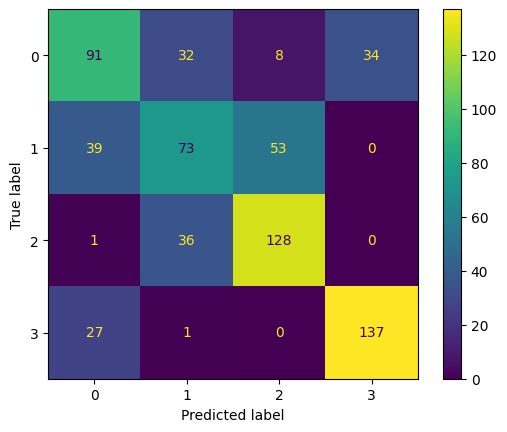

In [ ]:
matrix = confusion_matrix(y_test, pred, labels=df_y.unique(), normalize=None)
disp = ConfusionMatrixDisplay(confusion_matrix=matrix)
disp.plot();

Для используемого датасета логистическая регрессия оказывается менее точной, чем KNN, так как она предполагает линейные зависимости между параметрами и предсказываемым значением для всего множества вхождений в датасете. Из предварительного анализа мы убедились, что линейно разделить ценовые диапазоны не получится,
KNN опирается на более локальные паттерны данных и оказывается намного точнее

In [ ]:
parameters = {
    'penalty': ['l1', 'l2', None],
    'C':[1, 10],
    'fit_intercept': [True, False]
}

logreg = LogisticRegression(solver='saga', random_state=42)
clf = GridSearchCV(logreg, parameters, cv=5, verbose=1)
clf.fit(x_train, y_train);

Fitting 5 folds for each of 12 candidates, totalling 60 fits


In [ ]:
logreg = clf.best_estimator_
pred = logreg.predict(x_test)
print(classification_report(pred, y_test))

              precision    recall  f1-score   support

           0       0.87      0.83      0.85       173
           1       0.58      0.61      0.59       155
           2       0.42      0.50      0.46       139
           3       0.77      0.66      0.71       193

    accuracy                           0.66       660
   macro avg       0.66      0.65      0.65       660
weighted avg       0.68      0.66      0.67       660



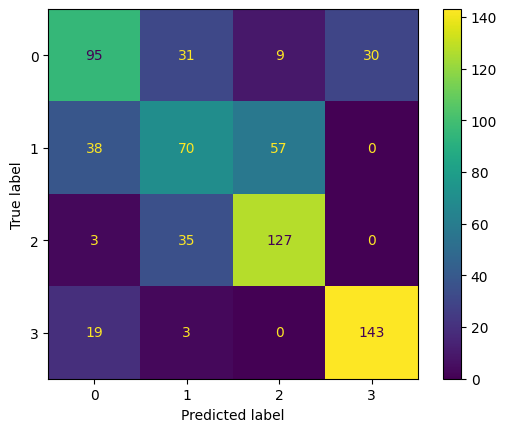

In [ ]:
matrix = confusion_matrix(y_test, pred, labels=df_y.unique(), normalize=None)
disp = ConfusionMatrixDisplay(confusion_matrix=matrix)
disp.plot();